<a href="https://colab.research.google.com/github/thanaphornkanking/BSC_DPDM23/blob/main/Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation

In [ ]:
import pandas as pd
import numpy as np

## Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [ ]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23/File/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [ ]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [ ]:
credit.head()

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,t,t,1,f,g,0,+
1,4.460,3.04,t,t,6,f,g,560,+
2,0.500,1.50,t,f,0,f,g,824,+
3,1.540,3.75,t,t,5,t,g,3,+
4,5.625,1.71,t,f,0,f,s,0,+


In [ ]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})

In [ ]:
credit = credit[['a9','a10','a12','a13','a16']]

In [ ]:
credit.head()

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1


## divide data into train and test

In [ ]:
import numpy as np

In [ ]:
np.random.seed(seed=1)

In [ ]:
a = np.random.randint(2, size=len(credit))

In [ ]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [ ]:
train = credit[a == 1]
train.shape

(324, 5)

In [ ]:
test = credit[a == 0]
test.shape

(366, 5)

In [ ]:
train

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
4,1,0,0,3,1
5,1,0,1,1,1
6,1,0,1,1,1
...,...,...,...,...,...
676,0,1,1,1,0
677,0,1,0,1,0
678,0,0,0,1,0
680,0,0,0,1,0


## Start Decision Tree

### import

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### define

In [ ]:
Dtree1 = DecisionTreeClassifier(random_state=0)

### train

In [ ]:
X_train = train.iloc[:,:-1]

In [ ]:
y_train = train.iloc[:,-1]

##Dtree1

In [ ]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn import tree

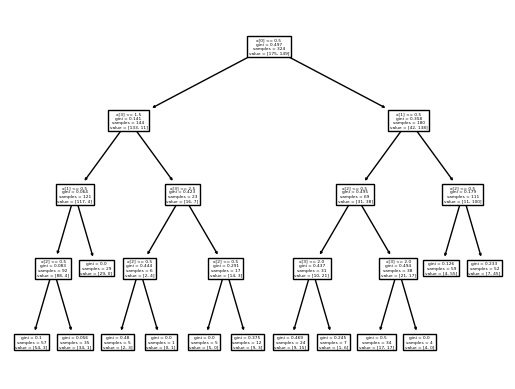

In [ ]:
tree.plot_tree(Dtree1);

### test

In [ ]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
y_test

2      1
3      1
9      1
10     1
12     1
      ..
685    0
686    0
687    0
688    0
689    0
Name: a16, Length: 366, dtype: int64

In [ ]:
y_predict = Dtree1.predict(X_test)

In [ ]:
y_predict

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_predict)

0.8387978142076503

## Set parameter

### Import

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [ ]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=2)

### Train

In [ ]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

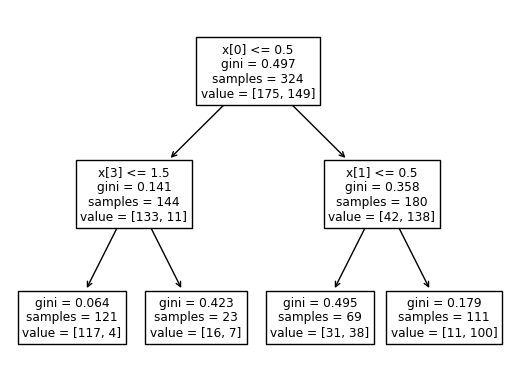

In [ ]:
tree.plot_tree(Dtree2);

### Test

In [ ]:
y_predict2 = Dtree2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict2)

0.8715846994535519

# HW3

ให้แต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้ และ มาอธิบาย parameter ของตัวเอง ว่ามันคืออะไร

- แถว 1 criterion, max_leaf_nodes
- แถว 2 splitter, min_samples_split
- แถว 3 min_samples_leaf, max_features
- แถว 4 min_impurity_decrease
- แถว 5 min_weight_fraction_leaf

## แถว 5 min_weight_fraction_leaf

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


## tain & test

In [ ]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]


## กำหนด min_weight_fraction_leaf ในการ Train

- ปรับค่า min_weight_fraction_leaf ต่ำที่สุด หรือ ใกล้เคียง 0

In [ ]:
Dtree3 = DecisionTreeClassifier(random_state=0, min_weight_fraction_leaf=0.001)

- ปรับค่า min_weight_fraction_leaf สูงที่สุด หรือ ใกล้เคียง 0.5

In [ ]:
Dtree4 = DecisionTreeClassifier(random_state=0, min_weight_fraction_leaf=0.499)

## DecisionTreeClassifier

- Min

In [ ]:
Dtree3.fit(X_train, y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.001, random_state=0)

 - Max

In [ ]:
Dtree4.fit(X_train, y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.499, random_state=0)

## Visualize the tree

- Min tree plot

In [ ]:
import matplotlib.pyplot as plt

[Text(0.5217391304347826, 0.9, 'x[0] <= 0.5\ngini = 0.497\nsamples = 324\nvalue = [175, 149]'),
 Text(0.2391304347826087, 0.7, 'x[3] <= 1.5\ngini = 0.141\nsamples = 144\nvalue = [133, 11]'),
 Text(0.13043478260869565, 0.5, 'x[1] <= 0.5\ngini = 0.064\nsamples = 121\nvalue = [117, 4]'),
 Text(0.08695652173913043, 0.3, 'x[2] <= 0.5\ngini = 0.083\nsamples = 92\nvalue = [88, 4]'),
 Text(0.043478260869565216, 0.1, 'gini = 0.1\nsamples = 57\nvalue = [54, 3]'),
 Text(0.13043478260869565, 0.1, 'gini = 0.056\nsamples = 35\nvalue = [34, 1]'),
 Text(0.17391304347826086, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.34782608695652173, 0.5, 'x[3] <= 2.5\ngini = 0.423\nsamples = 23\nvalue = [16, 7]'),
 Text(0.2608695652173913, 0.3, 'x[2] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.21739130434782608, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.30434782608695654, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.43478260869565216, 0.3, 'x[2] <= 0.5\ngi

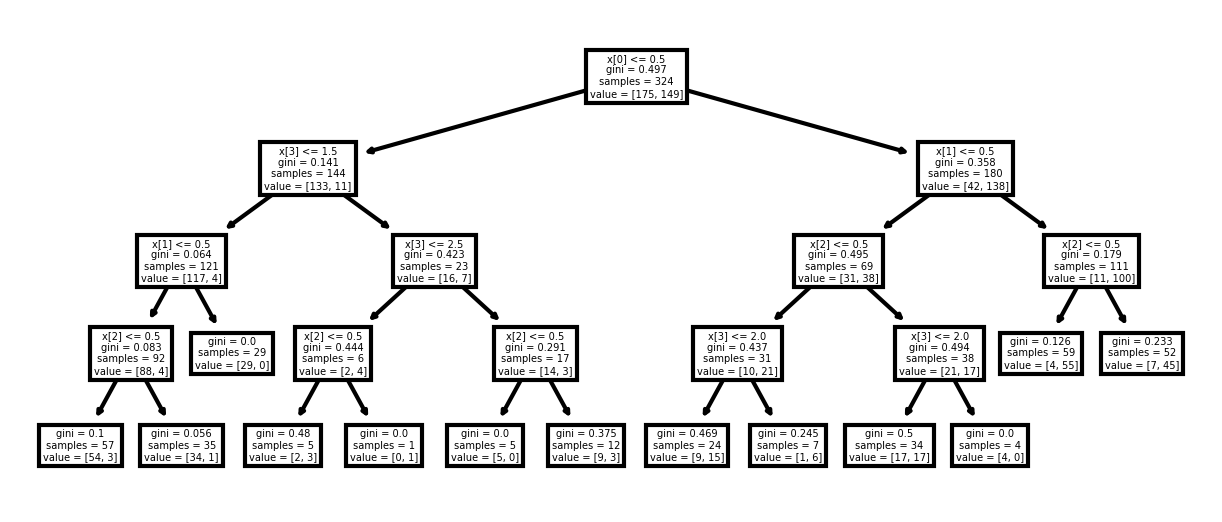

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,2), dpi=300)
tree.plot_tree(Dtree3, ax=axes)

 - Max tree plot

[Text(0.5, 0.5, 'gini = 0.497\nsamples = 324\nvalue = [175, 149]')]

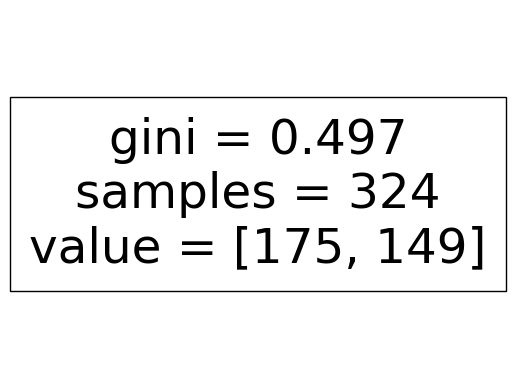

In [ ]:
tree.plot_tree(Dtree4)

## Make predictions

In [ ]:
y_predict3 = Dtree3.predict(X_test)


In [ ]:
y_predict4 = Dtree4.predict(X_test)

##  Calculate accuracy

- Lowest min_weight_fraction_leaf

อธิบาย:

- โครงสร้างต้นไม้: มีการแตกกิ่งมาก, อาจมีความลึก
- ความเสี่ยงของการ Overfitting: สูง เพราะโมเดลอาจซับซ้อนเกินไป จับเอาสัญญาณรบกวนในข้อมูลการฝึกฝนเป็นลวดลายที่มีความสำคัญ
- ประสิทธิภาพของโมเดล: ความแม่นยำสูงบนข้อมูลการฝึก แต่อาจมีประสิทธิภาพที่ไม่ดีเมื่อทดสอบกับข้อมูลใหม่
- การตีความ: ต่ำ เนื่องจากความซับซ้อนและขนาดของต้นไม้

In [ ]:
accuracy = accuracy_score(y_test, y_predict3)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8387978142076503


- Highest min_weight_fraction_leaf

อธิบาย:

- โครงสร้างต้นไม้: ง่ายมาก อาจมีเพียงโหนดรากหรือโหนดที่ตื้นๆ ไม่กี่โหนด
- ความเสี่ยงของการ Underfitting: สูง เพราะโมเดลอาจง่ายเกินไป ไม่สามารถจับลักษณะสำคัญของข้อมูลได้
- ประสิทธิภาพของโมเดล:ความแม่นยำต่ำบนข้อมูลการฝึกสะท้อนถึงความ
ไม่สามารถของโมเดลในการฟิตข้อมูลได้ดี
- การตีความ: สูง เนื่องจากต้นไม้นั้นง่ายและเข้าใจได้ง่าย



In [ ]:
accuracy = accuracy_score(y_test, y_predict4)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5683060109289617
